In [18]:
import sys
sys.path.insert(0, '../')

In [19]:
import numpy as np
import pandas as pd
import scipy.optimize as opt
import DataAnalysis as da
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
wav_func = lambda x: d*np.sin(np.arctan(x/(48)))
def wav_err(x, d, l, x_err, d_err, l_err):
    prop_d = np.sin(np.arctan(x/l))
    prop_x = d*np.cos(np.arctan(x/l))*(1/((x/l)**2 + 1))*(1/l)
    prop_l = d*np.cos(np.arctan(x/l))*(1/((x/l)**2 + 1))*(x/l**2)
    return da.quartrature_sum([prop_d*d_err, prop_l*l_err, prop_x*x_err])


In [21]:
d = .01/5000
d_err = .01/5000**2*200

# Experiment 1

## 1.1 Calibration

In [50]:
rn_og = np.array([14.75, 15.2, 14.85, 15, 15.1, 14.9, 15.15, 14.95])
rn = np.mean([14.75, 15.2, 14.85, 15, 15.1, 14.9, 15.15, 14.95])
ang_form = lambda x: np.arctan(x/(48-.8))/np.pi*180
ang = ang_form(rn)
print("The wavelength is: ")
print(d*np.sin(ang*np.pi/180))

The wavelength is: 
6.052820138076754e-07


In [51]:
pd.DataFrame(wav_func(rn_og)).describe()

,0
count,8.000000e+00
mean,5.960902e-07
std,5.627160e-09
min,5.874720e-07
25%,5.924697e-07
50%,5.956438e-07
75%,6.006218e-07
max,6.037834e-07


In [52]:
print(f"Wavelength: {wav_func(rn)} +- {wav_err(rn, d, 48, .2, 8e-08,1)}")

Wavelength: 5.960970391262976e-07 +- 2.736976709872075e-08


## 1.2 Helium Spectra

In [70]:
he_wav = [0,0,0,0,0,0, 0]
he_wav_err = [0,0,0,0,0,0, 0]

### Red

In [71]:
rn = np.mean([17.25, 17.2, 16.9, 17.05])
he_wav[0] = wav_func(rn)
he_wav_err[0] = wav_err(rn, d, 48, .2, 8e-08,1)
print(f"Wavelength: {wav_func(rn)} +- {wav_err(rn, d, 48, .2, 8e-08,1)}")

Wavelength: 6.711807150756848e-07 +- 3.03852119399957e-08


### Orange

In [72]:
rn = np.mean([15.6, 15.7, 15.7, 15.8])
he_wav[1] = wav_func(rn)
he_wav_err[1] = wav_err(rn, d, 48, .2, 8e-08,1)
print(f"Wavelength: {wav_func(rn)} +- {wav_err(rn, d, 48, .2, 8e-08,1)}")

Wavelength: 6.217529228132714e-07 +- 2.8401362427279606e-08


### Yellow

In [73]:
rn = np.mean([14.75, 15.2, 14.85, 15, 15.1, 14.9, 15.15, 14.95])
he_wav[2] = wav_func(rn)
he_wav_err[2] = wav_err(rn, d, 48, .2, 8e-08,1)
print(f"Wavelength: {wav_func(rn)} +- {wav_err(rn, d, 48, .2, 8e-08,1)}")

Wavelength: 5.960970391262976e-07 +- 2.736976709872075e-08


### Green

In [74]:
rn = np.mean([12.6, 12.3, 12.5, 12.7])
he_wav[3] = wav_func(rn)
he_wav_err[3] = wav_err(rn, d, 48, .2, 8e-08,1)
print(f"Wavelength: {wav_func(rn)} +- {wav_err(rn, d, 48, .2, 8e-08,1)}")

Wavelength: 5.049668841353456e-07 +- 2.3706360589274706e-08


### Aqua

In [75]:
rn = np.mean([11.7, 11.65, 11.7, 11.6])
he_wav[4] = wav_func(rn)
he_wav_err[4] = wav_err(rn, d, 48, .2, 8e-08,1)
print(f"Wavelength: {wav_func(rn)} +- {wav_err(rn, d, 48, .2, 8e-08,1)}")

Wavelength: 4.721994769383222e-07 +- 2.239442063229532e-08


### Low Violet

In [76]:
rn = np.mean([10.2, 9.9, 10.5, 10])
he_wav[5] = wav_func(rn)
he_wav_err[5] = wav_err(rn, d, 48, .2, 8e-08,1)
print(f"Wavelength: {wav_func(rn)} +- {wav_err(rn, d, 48, .2, 8e-08,1)}")

Wavelength: 4.137671070960752e-07 +- 2.0072649167733456e-08


### High Violet

In [79]:
rn = np.mean([11.2, 11.1, 11.2, 10.85])
he_wav[6] = wav_func(rn)
he_wav_err[6] = wav_err(rn, d, 48, .2, 8e-08,1)
print(f"Wavelength: {wav_func(rn)} +- {wav_err(rn, d, 48, .2, 8e-08,1)}")

Wavelength: 4.5012669085490525e-07 +- 2.1514097846118858e-08


# Experiment 2

## 2.1 Hydrogen Spectra

In [5]:
h_wav = [0,0,0]
h_wav_err = [0,0,0]

In [13]:
balmer_wav = lambda x: 1.1e7*(1/4 - 1/x**2)

### Red

In [6]:
rn = np.mean([17.1, 16.75, 16.7, 17.15, 16.75, 17.05, 17, 16.9])
h_wav[0] = wav_func(rn)
h_wav_err[0] = wav_err(rn, d, 48, .2, 8e-08,1)
print(f"Wavelength: {wav_func(rn)} +- {wav_err(rn, d, 48, .2, d_err,1)}")

Wavelength: 6.650749560943274e-07 +- 3.0140498134675304e-08


In [15]:
1/balmer_wav(3)

6.545454545454546e-07

### Aqua

In [7]:
rn = np.mean([12.2, 12.25, 12.6, 12, 12.3, 12.05, 12.35, 12])
h_wav[1] = wav_func(rn)
h_wav_err[1] = wav_err(rn, d, 48, .2, 8e-08,1)
print(f"Wavelength: {wav_func(rn)} +- {wav_err(rn, d, 48, .2, d_err,1)}")


Wavelength: 4.933801077447869e-07 +- 2.3241883072738124e-08


In [16]:
1/balmer_wav(4)

4.848484848484849e-07

### Violet

In [8]:
rn = np.mean([10.85, 10.8, 10.95, 10.7, 10.8, 10.8, 10.8, 10.7])
h_wav[2] = wav_func(rn)
h_wav_err[2] = wav_err(rn, d, 48, .2, 8e-08,1)
print(f"Wavelength: {wav_func(rn)} +- {wav_err(rn, d, 48, .2, d_err,1)}")

Wavelength: 4.3902439024390246e-07 +- 2.1072669542658126e-08


In [17]:
1/balmer_wav(6)

4.0909090909090906e-07

In [9]:
h_inv_wav = np.divide(1, h_wav)
h_inv_wav_err = np.divide(1, np.power(h_wav, 2))*h_wav_err
balmer_ser = list(map(lambda x: 1/x**2, [3, 4, 6]))

In [10]:
[m, c], [m_err, c_err], [y_pred, res], chi =  da.weighted_least_squares_linear(balmer_ser, h_inv_wav, h_inv_wav_err)

In [11]:
chi

[0.36681255236336374]

Text(0.03, 1500000.0, 'y = (-9.6e+06±1.5e+06)*x + (2.6e+06±1.3e+05)')

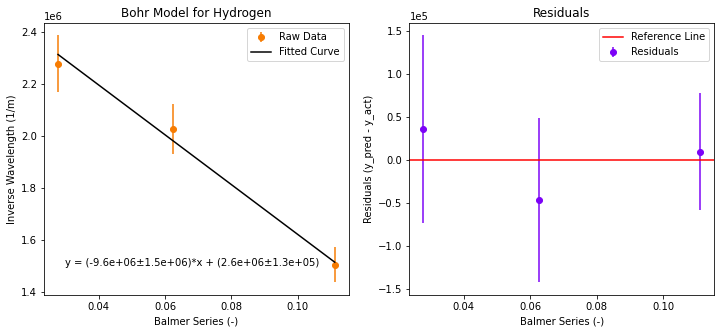

In [12]:
fig, ax = plt.subplots(1,2, figsize=(12, 5))
ax[0].errorbar(balmer_ser, h_inv_wav,yerr=h_inv_wav_err, fmt='o', color='#f77c02', label="Raw Data")
ax[0].errorbar(balmer_ser, y_pred, label="Fitted Curve", color="black")
ax[1].errorbar(balmer_ser, res, yerr=h_inv_wav_err, fmt='o', color='#7c02f7', label="Residuals")
ax[1].axhline(0, label="Reference Line", color="r")
ax[0].set_title("Bohr Model for Hydrogen")
ax[1].set_title("Residuals")
ax[0].set_xlabel("Balmer Series (-)")
ax[0].set_ylabel("Inverse Wavelength (1/m)")
ax[0].legend()
ax[1].set_xlabel("Balmer Series (-)")
ax[1].set_ylabel("Residuals (y_pred - y_act)")
ax[1].get_yaxis().get_major_formatter().set_powerlimits((0, 0))
ax[1].legend()
ax[0].text(.03, 1.5e6, f"y = ({m:.1e}±{m_err:.1e})*x + ({c:.1e}±{c_err:.1e})")

# Experiment 3

### Gas A - Red Orange

In [27]:
rn = np.mean([15.55, 15.55, 15.6, 15.4,15.3,15.3])
print(f"Wavelength: {wav_func(rn):.2e} +- {wav_err(rn, d, 48, .2, 8e-08,1):.2e}")

Wavelength: 6.13e-07 +- 2.80e-08


### Gas A - Green

In [28]:
rn = np.mean([13.25, 12.95, 13.2, 13, 13.2, 12.9])
print(f"Wavelength: {wav_func(rn):.2e} +- {wav_err(rn, d, 48, .2, 8e-08,1):.2e}")

Wavelength: 5.26e-07 +- 2.45e-08


### Gas B - Red

In [29]:
rn = np.mean([16.8, 16.2, 16.8, 16.2, 16.7, 16.3])
print(f"Wavelength: {wav_func(rn):.2e} +- {wav_err(rn, d, 48, .2, 8e-08,1):.2e}")

Wavelength: 6.50e-07 +- 2.95e-08


### Gas B - Yellow

In [30]:
rn = np.mean([15.3, 14.7, 15.35, 14.7, 15.45, 14.6])
print(f"Wavelength: {wav_func(rn):.2e} +- {wav_err(rn, d, 48, .2, 8e-08,1):.2e}")

Wavelength: 5.97e-07 +- 2.74e-08


# Experiment 4

In [15]:
ayu_high = [18.35, 19.05, 19.4, 19.1, 19.4, 19.75]
ayu_low = [10, 10.3, 9.9, 10, 9.9, 10]

In [25]:
pd.DataFrame(zip(ayu_high, ayu_low)).describe()

,0,1
count,6.000000,6.000000
mean,19.175000,10.016667
std,0.476183,0.147196
min,18.350000,9.900000
25%,19.062500,9.925000
50%,19.250000,10.000000
75%,19.400000,10.000000
max,19.750000,10.300000


In [8]:
high = 19.175000
low = 10.016667
ang_form = lambda x: np.arctan(x/(.48))/np.pi*180
angh = ang_form(high/100)
angl = ang_form(low/100)
print("The wavelength is: ")
print(d*np.sin(angh*np.pi/180))
print(d*np.sin(angl*np.pi/180))

The wavelength is: 
7.419473667297926e-07
4.0856002113118367e-07


In [32]:
rn = np.mean([15.3, 14.7, 15.35, 14.7, 15.45, 14.6])
ang_form = lambda x: np.arctan(x/(.48))/np.pi*180
ang = ang_form(rn/100)
print("The wavelength is: ")
print(d*np.sin(ang*np.pi/180))

The wavelength is: 
5.971537590951148e-07


In [13]:
sophie_high = [19.9, 18.3, 18.4, 18.6, 19.2, 19.3]
sophie_low = [10.05, 9.6, 9.75, 9.7, 9.7, 9.6]

In [14]:
pd.DataFrame(zip(sophie_high, sophie_low)).describe()

,0,1
count,6.000000,6.000000
mean,18.950000,9.733333
std,0.622093,0.166333
min,18.300000,9.600000
25%,18.450000,9.625000
50%,18.900000,9.700000
75%,19.275000,9.737500
max,19.900000,10.050000


In [11]:
high = 18.950000
low = 9.733333
ang_form = lambda x: np.arctan(x/(.48))/np.pi*180
angh = ang_form(high/100)
angl = ang_form(low/100)
print("The wavelength is: ")
print(d*np.sin(angh*np.pi/180))
print(d*np.sin(angl*np.pi/180))

The wavelength is: 
7.3442130820208e-07
3.974661889466431e-07


In [18]:
total_high = ayu_high + sophie_high
total_low = ayu_low + sophie_low

In [19]:
pd.DataFrame(zip(total_high, total_low)).describe()

,0,1
count,12.000000,12.000000
mean,19.062500,9.875000
std,0.541095,0.210519
min,18.300000,9.600000
25%,18.550000,9.700000
50%,19.150000,9.900000
75%,19.400000,10.000000
max,19.900000,10.300000


In [28]:
high = 19.062500-.5
low = 9.875000
ang_form = lambda x: np.arctan(x/(.48+.01))/np.pi*180
angh = ang_form(high/100)
angl = ang_form(low/100)
print("The wavelength is: ")
print(d*np.sin(angh*np.pi/180))
print(d*np.sin(angl*np.pi/180))

The wavelength is: 
7.085173443686753e-07
3.951173178707e-07


In [ ]:
# Florencence 

In [30]:
red = np.mean([22.5, 23, 22.4, 22.7,22.7, 22.75, 22.5, 22.95])
ang_form = lambda x: np.arctan(x/(.7))/np.pi*180
ang = ang_form(red/100)
print("The wavelength is: ")
print(d*np.sin(ang*np.pi/180))

The wavelength is: 
6.166355084849781e-07


In [31]:
indigo = np.mean([15.7, 15.8, 15.8, 15.9, 15.8, 15.85, 15.8, 15.8])
ang_form = lambda x: np.arctan(x/(.7))/np.pi*180
ang = ang_form(indigo/100)
print("The wavelength is: ")
print(d*np.sin(ang*np.pi/180))

The wavelength is: 
4.405163965646312e-07
